In [38]:
%reset -f

import pandas as pd
import numpy as np
import folium   
import os
import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
import seaborn as sns
import nrarfcn as nr
# https://gitlab.com/alexander_marder/earfcn
# https://pypi.org/project/earfcn/0.0.3/
from earfcn.convert import earfcn2freq

#### Read Data

In [39]:
df_5g_radio = pd.read_csv('../_data/Spring2025_ArkansasNH/5g_radio.csv', sep=';')
df_5g_pdsch = pd.read_csv('../_data/Spring2025_ArkansasNH/5g_pdsch.csv', sep=';')
df_5g_pusch = pd.read_csv('../_data/Spring2025_ArkansasNH/5g_pusch.csv', sep=';')

df_lte_radio = pd.read_csv('../_data/Spring2025_ArkansasNH/lte_radio.csv', sep=';')
df_lte_pdsch = pd.read_csv('../_data/Spring2025_ArkansasNH/lte_pdsch.csv', sep=';')
df_lte_pusch = pd.read_csv('../_data/Spring2025_ArkansasNH/lte_pusch.csv', sep=';')

df_wifi_scan = pd.read_csv('../_data/Spring2025_ArkansasNH/wifi_scan.csv', sep=';')
df_wifi_connected = pd.read_csv('../_data/Spring2025_ArkansasNH/wifi_connected.csv', sep=';')

df_app_capacity = pd.read_csv('../_data/Spring2025_ArkansasNH/app_capacity.csv', sep=';')
df_app_ping = pd.read_csv('../_data/Spring2025_ArkansasNH/app_ping.csv', sep=';')
df_app_ping_int = pd.read_csv('../_data/Spring2025_ArkansasNH/app_ping_intermediate.csv', sep=';')

#### Application - Capacity

In [41]:
print(df_app_capacity['Collection'].value_counts())

Collection
Day1-TMO-MNO-DEF-IN       152
Day1-TMO-NH-IN             77
Day2-ATT-MNO-DEF-OUT       74
Day1-ATT-NH-OUT            67
Day1-TMO-MNO-DEF-OUT       64
Day1-TMO-NH-OUT            63
Day2-ATT-MNO-4G-IN         63
Day2-VZN-MNO-4G-IN         61
Day2-TMO-MNO-4G-OUT        61
Day2-VZN-MNO-4G-OUT        60
Day2-ATT-MNO-DEF-IN        60
Day2-TMO-MNO-4G-IN         57
Day1-WIFI-OUT              56
Day2-VZN-MNO-DEF-IN        56
Day1-ATT-MNO-DEF-IN        53
Day2-TMO-MNO-DEF-OUT       51
Day1-ATT-NH-IN             50
Day2-ATT-MNO-4G-OUT        49
Day3_TMO-NH-L1             48
Day2-TMO-MNO-DEF-IN        46
Day1-ATT-MNO-DEF-OUT       43
Day2-TMO-MNO-DEF-OUTER     41
Day2-VZN-MNO-DEF-OUT       38
Day2-ATT-MNO-DEF-OUTER     37
Day2-VZN-MNO-DEF-OUTER     36
Day3_ATT-NH-IN-L2          35
Day3_ATT-MNO-DEF-IN-L1     33
Day1-WIFI-IN               33
Day3_ATT-MNO-DEF-IN-L2     30
Day3_TMO-DEF-L1-V1         30
Day3_TMO-NH-L2             21
Day3_ATT-NH-IN-L1          18
Day3_TMO-DEF-IN-L2         14

In [42]:
df_app_capacity = df_app_capacity[df_app_capacity['Test Status'] == 'Completed']
df_app_capacity['MB Transferred'] = df_app_capacity['Bytes Transferred'] * 10e-6
df_app_capacity['IP Throughput in Mbps'] = df_app_capacity['IP Throughput'] * 10e-3
df_app_capacity['Calculated IP Tput in Mbps'] = df_app_capacity['Bytes Transferred'] * 8 * 10e-6 / df_app_capacity['Duration']

### WiFi

df_app_capacity_wifi = df_app_capacity[df_app_capacity['Data Technology'] == 'WiFi']
df_app_capacity_wifi_dl = df_app_capacity_wifi[df_app_capacity_wifi['Direction'] == 'Downlink']
df_app_capacity_wifi_ul = df_app_capacity_wifi[df_app_capacity_wifi['Direction'] == 'Uplink']

# df_app_capacity_wifi_dl_in = df_app_capacity_wifi_dl[df_app_capacity_wifi_dl['Collection'] == 'Day1-WIFI-IN']
# df_app_capacity_wifi_dl_out = df_app_capacity_wifi_dl[df_app_capacity_wifi_dl['Collection'] == 'Day1-WIFI-OUT']
# df_app_capacity_wifi_ul_in = df_app_capacity_wifi_ul[df_app_capacity_wifi_ul['Collection'] == 'Day1-WIFI-IN']
# df_app_capacity_wifi_ul_out = df_app_capacity_wifi_ul[df_app_capacity_wifi_ul['Collection'] == 'Day1-WIFI-OUT']

### MNO

df_app_capacity_mno_att_dl = df_app_capacity[df_app_capacity['Collection'].str.contains('-ATT-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Downlink')]
df_app_capacity_mno_tmo_dl = df_app_capacity[df_app_capacity['Collection'].str.contains('-TMO-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Downlink')]
df_app_capacity_mno_vzn_dl = df_app_capacity[df_app_capacity['Collection'].str.contains('-VZN-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Downlink')]
df_app_capacity_mno_att_ul = df_app_capacity[df_app_capacity['Collection'].str.contains('-ATT-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Uplink')]
df_app_capacity_mno_tmo_ul = df_app_capacity[df_app_capacity['Collection'].str.contains('-TMO-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Uplink')]
df_app_capacity_mno_vzn_ul = df_app_capacity[df_app_capacity['Collection'].str.contains('-VZN-MNO-') &
                                             df_app_capacity['Direction'].str.contains('Uplink')]

### NH

df_app_capacity_nh_att_dl = df_app_capacity[df_app_capacity['Collection'].str.contains('-ATT-NH-') &
                                            df_app_capacity['Direction'].str.contains('Downlink')]
df_app_capacity_nh_tmo_dl = df_app_capacity[df_app_capacity['Collection'].str.contains('-TMO-NH-') &
                                            df_app_capacity['Direction'].str.contains('Downlink')]
df_app_capacity_nh_att_ul = df_app_capacity[df_app_capacity['Collection'].str.contains('-ATT-NH-') &
                                            df_app_capacity['Direction'].str.contains('Uplink')]
df_app_capacity_nh_tmo_ul = df_app_capacity[df_app_capacity['Collection'].str.contains('-TMO-NH-') &
                                            df_app_capacity['Direction'].str.contains('Uplink')]

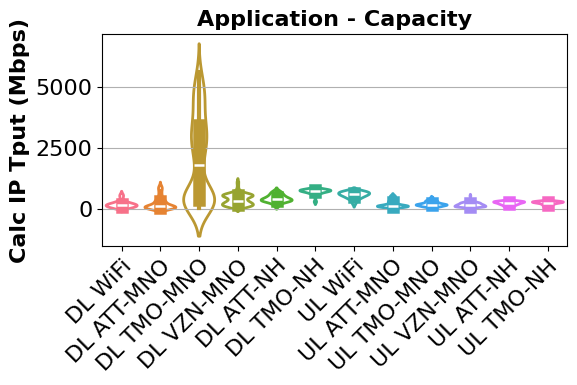

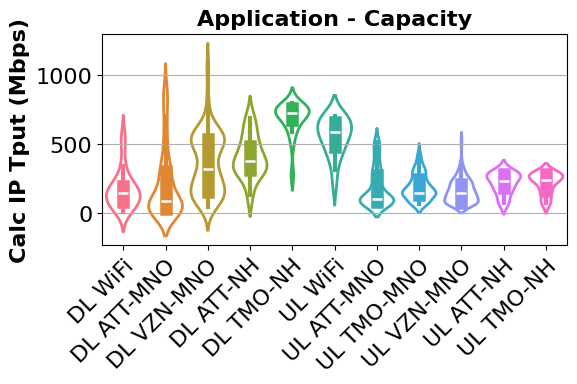

In [43]:
# Application - Capacity - IP Throughput
fig, ax = plt.subplots(figsize=(6, 2.75))
data = pd.concat([
    df_app_capacity_wifi_dl.assign(Collection_plot='DL WiFi'),
    df_app_capacity_mno_att_dl.assign(Collection_plot='DL ATT-MNO'),
    df_app_capacity_mno_tmo_dl.assign(Collection_plot='DL TMO-MNO'),
    df_app_capacity_mno_vzn_dl.assign(Collection_plot='DL VZN-MNO'),
    df_app_capacity_nh_att_dl.assign(Collection_plot='DL ATT-NH'),
    df_app_capacity_nh_tmo_dl.assign(Collection_plot='DL TMO-NH'),
    df_app_capacity_wifi_ul.assign(Collection_plot='UL WiFi'),
    df_app_capacity_mno_att_ul.assign(Collection_plot='UL ATT-MNO'),
    df_app_capacity_mno_tmo_ul.assign(Collection_plot='UL TMO-MNO'),
    df_app_capacity_mno_vzn_ul.assign(Collection_plot='UL VZN-MNO'),
    df_app_capacity_nh_att_ul.assign(Collection_plot='UL ATT-NH'),
    df_app_capacity_nh_tmo_ul.assign(Collection_plot='UL TMO-NH')
])
sns.violinplot(data=data, x='Collection_plot', y='Calculated IP Tput in Mbps', hue='Collection_plot', fill=False, linewidth=2, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Calc IP Tput (Mbps)', fontsize=16, fontweight='bold')
plt.title('Application - Capacity', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, data


# Application - Capacity - IP Throughput
fig, ax = plt.subplots(figsize=(6, 2.75))
data = pd.concat([
    df_app_capacity_wifi_dl.assign(Collection_plot='DL WiFi'),
    df_app_capacity_mno_att_dl.assign(Collection_plot='DL ATT-MNO'),
    # df_app_capacity_mno_tmo_dl.assign(Collection_plot='DL TMO-MNO'),
    df_app_capacity_mno_vzn_dl.assign(Collection_plot='DL VZN-MNO'),
    df_app_capacity_nh_att_dl.assign(Collection_plot='DL ATT-NH'),
    df_app_capacity_nh_tmo_dl.assign(Collection_plot='DL TMO-NH'),
    df_app_capacity_wifi_ul.assign(Collection_plot='UL WiFi'),
    df_app_capacity_mno_att_ul.assign(Collection_plot='UL ATT-MNO'),
    df_app_capacity_mno_tmo_ul.assign(Collection_plot='UL TMO-MNO'),
    df_app_capacity_mno_vzn_ul.assign(Collection_plot='UL VZN-MNO'),
    df_app_capacity_nh_att_ul.assign(Collection_plot='UL ATT-NH'),
    df_app_capacity_nh_tmo_ul.assign(Collection_plot='UL TMO-NH')
])
sns.violinplot(data=data, x='Collection_plot', y='Calculated IP Tput in Mbps', hue='Collection_plot', fill=False, linewidth=2, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Calc IP Tput (Mbps)', fontsize=16, fontweight='bold')
plt.title('Application - Capacity', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, data

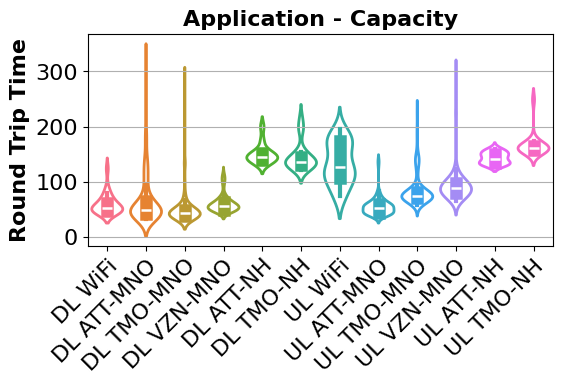

In [44]:
# Application - Capacity - Round Trip Time
fig, ax = plt.subplots(figsize=(6, 2.75))
data = pd.concat([
    df_app_capacity_wifi_dl.assign(Collection_plot='DL WiFi'),
    df_app_capacity_mno_att_dl.assign(Collection_plot='DL ATT-MNO'),
    df_app_capacity_mno_tmo_dl.assign(Collection_plot='DL TMO-MNO'),
    df_app_capacity_mno_vzn_dl.assign(Collection_plot='DL VZN-MNO'),
    df_app_capacity_nh_att_dl.assign(Collection_plot='DL ATT-NH'),
    df_app_capacity_nh_tmo_dl.assign(Collection_plot='DL TMO-NH'),
    df_app_capacity_wifi_ul.assign(Collection_plot='UL WiFi'),
    df_app_capacity_mno_att_ul.assign(Collection_plot='UL ATT-MNO'),
    df_app_capacity_mno_tmo_ul.assign(Collection_plot='UL TMO-MNO'),
    df_app_capacity_mno_vzn_ul.assign(Collection_plot='UL VZN-MNO'),
    df_app_capacity_nh_att_ul.assign(Collection_plot='UL ATT-NH'),
    df_app_capacity_nh_tmo_ul.assign(Collection_plot='UL TMO-NH')
])
sns.violinplot(data=data, x='Collection_plot', y='Round Trip Time', hue='Collection_plot', fill=False, linewidth=2, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Round Trip Time', fontsize=16, fontweight='bold')
plt.title('Application - Capacity', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, data

#### Application - Ping

In [45]:
print(df_app_ping['Collection'].value_counts())

Collection
Day1-TMO-MNO-DEF-IN       58
Day1-ATT-NH-OUT           33
Day1-TMO-NH-OUT           31
Day1-WIFI-OUT             28
Day2-VZN-MNO-DEF-IN       26
Day1-TMO-MNO-DEF-OUT      22
Day1-TMO-NH-IN            22
Day2-ATT-MNO-4G-IN        21
Day2-ATT-MNO-DEF-IN       21
Day2-ATT-MNO-4G-OUT       20
Day2-ATT-MNO-DEF-OUT      19
Day1-ATT-MNO-DEF-OUT      19
Day2-VZN-MNO-4G-IN        18
Day1-ATT-NH-IN            18
Day2-TMO-MNO-DEF-OUT      18
Day2-VZN-MNO-4G-OUT       17
Day2-VZN-MNO-DEF-OUT      17
Day2-TMO-MNO-4G-OUT       17
Day1-ATT-MNO-DEF-IN       17
Day2-TMO-MNO-4G-IN        17
Day2-TMO-MNO-DEF-IN       16
Day1-WIFI-IN              16
Day2-VZN-MNO-DEF-OUTER    16
Day3_ATT-NH-IN-L2         14
Day2-TMO-MNO-DEF-OUTER    13
Day3_TMO-NH-L1            13
Day2-ATT-MNO-DEF-OUTER    12
Day3_ATT-MNO-DEF-IN-L1     9
Day3_ATT-MNO-DEF-IN-L2     8
Day3_TMO-DEF-L1-V1         8
Day3_TMO-NH-L2             7
Day3_ATT-NH-IN-L1          7
Day3_TMO-DEF-IN-L2         6
Day3_TMO-DEF-L2            5
Day

In [46]:
df_app_ping = df_app_ping[df_app_ping['Test Status'] == 'Completed']

### WiFi

df_app_ping_wifi = df_app_ping[df_app_ping['Data Technology'] == 'WiFi']

# df_app_ping_wifi_dl_in = df_app_ping_wifi_dl[df_app_ping_wifi_dl['Collection'] == 'Day1-WIFI-IN']
# df_app_ping_wifi_dl_out = df_app_ping_wifi_dl[df_app_ping_wifi_dl['Collection'] == 'Day1-WIFI-OUT']
# df_app_ping_wifi_ul_in = df_app_ping_wifi_ul[df_app_ping_wifi_ul['Collection'] == 'Day1-WIFI-IN']
# df_app_ping_wifi_ul_out = df_app_ping_wifi_ul[df_app_ping_wifi_ul['Collection'] == 'Day1-WIFI-OUT']

### MNO

df_app_ping_mno_att = df_app_ping[df_app_ping['Collection'].str.contains('-ATT-MNO-')]
df_app_ping_mno_tmo = df_app_ping[df_app_ping['Collection'].str.contains('-TMO-MNO-')]
df_app_ping_mno_vzn = df_app_ping[df_app_ping['Collection'].str.contains('-VZN-MNO-')]

### NH

df_app_ping_nh_att = df_app_ping[df_app_ping['Collection'].str.contains('-ATT-NH-')]
df_app_ping_nh_tmo = df_app_ping[df_app_ping['Collection'].str.contains('-TMO-NH-')]


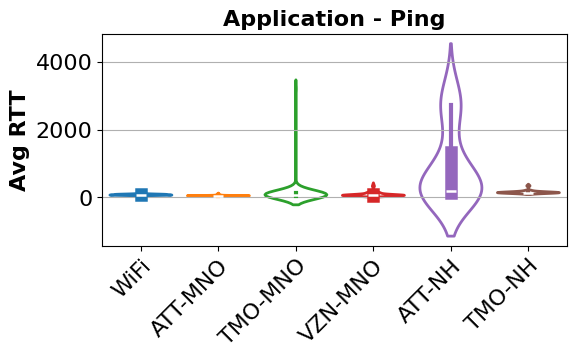

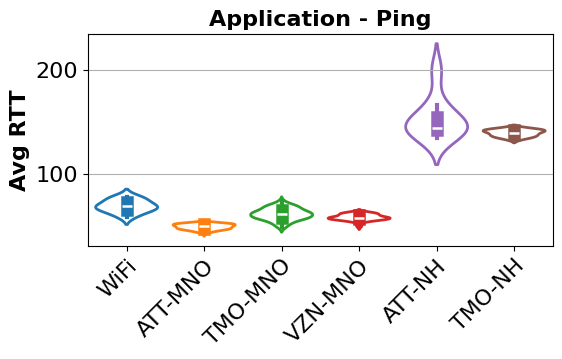

In [47]:
# Application - Ping - Avg RTT
fig, ax = plt.subplots(figsize=(6, 2.75))
data = pd.concat([
    df_app_ping_wifi.assign(Collection_plot='WiFi'),
    df_app_ping_mno_att.assign(Collection_plot='ATT-MNO'),
    df_app_ping_mno_tmo.assign(Collection_plot='TMO-MNO'),
    df_app_ping_mno_vzn.assign(Collection_plot='VZN-MNO'),
    df_app_ping_nh_att.assign(Collection_plot='ATT-NH'),
    df_app_ping_nh_tmo.assign(Collection_plot='TMO-NH')
])
sns.violinplot(data=data, x='Collection_plot', y='Round Trip Time Average', hue='Collection_plot', fill=False, linewidth=2, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Avg RTT', fontsize=16, fontweight='bold')
plt.title('Application - Ping', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, data


# Application - Ping - Avg RTT
fig, ax = plt.subplots(figsize=(6, 2.75))
data = pd.concat([
    df_app_ping_wifi[df_app_ping_wifi['Round Trip Time Average'] <= df_app_ping_wifi['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='WiFi'),
    df_app_ping_mno_att[df_app_ping_mno_att['Round Trip Time Average'] <= df_app_ping_mno_att['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='ATT-MNO'),
    df_app_ping_mno_tmo[df_app_ping_mno_tmo['Round Trip Time Average'] <= df_app_ping_mno_tmo['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='TMO-MNO'),
    df_app_ping_mno_vzn[df_app_ping_mno_vzn['Round Trip Time Average'] <= df_app_ping_mno_vzn['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='VZN-MNO'),
    df_app_ping_nh_att[df_app_ping_nh_att['Round Trip Time Average'] <= df_app_ping_nh_att['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='ATT-NH'),
    df_app_ping_nh_tmo[df_app_ping_nh_tmo['Round Trip Time Average'] <= df_app_ping_nh_tmo['Round Trip Time Average'].quantile(0.55)].assign(Collection_plot='TMO-NH')
])
sns.violinplot(data=data, x='Collection_plot', y='Round Trip Time Average', hue='Collection_plot', fill=False, linewidth=2, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Avg RTT', fontsize=16, fontweight='bold')
plt.title('Application - Ping', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, data

#### Application - Ping Intermediate

In [48]:
print(df_app_ping_int['Collection'].value_counts())

Collection
Day1-TMO-MNO-DEF-IN       490
Day1-TMO-MNO-DEF-OUT      220
Day2-ATT-MNO-DEF-IN       210
Day2-ATT-MNO-4G-IN        210
Day2-VZN-MNO-DEF-IN       209
Day1-TMO-NH-IN            202
Day2-ATT-MNO-4G-OUT       200
Day2-ATT-MNO-DEF-OUT      190
Day1-ATT-MNO-DEF-OUT      184
Day2-TMO-MNO-DEF-OUT      178
Day2-VZN-MNO-4G-IN        177
Day2-VZN-MNO-4G-OUT       170
Day2-TMO-MNO-4G-OUT       170
Day2-TMO-MNO-4G-IN        169
Day1-ATT-MNO-DEF-IN       168
Day2-TMO-MNO-DEF-IN       160
Day1-WIFI-IN              160
Day2-VZN-MNO-DEF-OUT      159
Day1-WIFI-OUT             150
Day2-VZN-MNO-DEF-OUTER    150
Day1-ATT-NH-IN            142
Day2-TMO-MNO-DEF-OUTER    130
Day3_ATT-NH-IN-L2         120
Day3_TMO-NH-L1            120
Day2-ATT-MNO-DEF-OUTER    111
Day1-ATT-NH-OUT            95
Day1-TMO-NH-OUT            83
Day3_ATT-MNO-DEF-IN-L1     81
Day3_ATT-MNO-DEF-IN-L2     80
Day3_TMO-DEF-L1-V1         71
Day3_ATT-NH-IN-L1          60
Day3_TMO-DEF-IN-L2         60
Day3_TMO-NH-L2             52

#### 5G-LTE Combining Shared Channel

In [ ]:
# Frequency calculation processing

df_5g_radio['DL Freq'] = df_5g_radio['DL NR-ARFCN'].apply(nr.get_frequency)
df_5g_radio['DL Freq'] = df_5g_radio['DL Freq'].round(-1)

df_lte_radio['DL Freq'] = df_lte_radio['DL EARFCN'].apply(earfcn2freq)
df_lte_radio['DL Freq'] = df_lte_radio['DL Freq'].round(-1)


df_5g_pdsch = df_5g_pdsch.dropna(subset=['DL NR-ARFCN'])
df_5g_pdsch['DL NR-ARFCN'] = df_5g_pdsch['DL NR-ARFCN'].astype(int)
df_5g_pdsch['DL Freq'] = df_5g_pdsch['DL NR-ARFCN'].apply(nr.get_frequency)
df_5g_pdsch['DL Freq'] = df_5g_pdsch['DL Freq'].round(-1)

df_lte_pdsch = df_lte_pdsch.dropna(subset=['DL EARFCN'])
df_lte_pdsch['DL Freq'] = df_lte_pdsch['DL EARFCN'].apply(earfcn2freq)
df_lte_pdsch['DL Freq'] = df_lte_pdsch['DL Freq'].round(-1)


# df_5g_pusch = df_5g_pusch.dropna(subset=['UL NR-ARFCN'])
# df_5g_pusch['UL NR-ARFCN'] = df_5g_pusch['UL NR-ARFCN'].astype(int)
# df_5g_pusch['UL Freq'] = df_5g_pusch['UL NR-ARFCN'].apply(nr.get_frequency)
# df_5g_pusch['UL Freq'] = df_5g_pusch['UL Freq'].round(-1)

# df_lte_pusch = df_lte_pusch.dropna(subset=['UL EARFCN'])
# df_lte_pusch['UL Freq'] = df_lte_pusch['UL EARFCN'].apply(earfcn2freq)
# df_lte_pusch['UL Freq'] = df_lte_pusch['UL Freq'].round(-1)

In [ ]:
### Renaming LTE & 5G PDSCH Columns
df_lte_pdsch.rename(columns={'RB per Subframe': 'RB per Subframe-Slot'}, inplace=True)
df_5g_pdsch.rename(columns={'Avg Num PDSCH RBs per Slot': 'RB per Subframe-Slot'}, inplace=True)
df_5g_pdsch.rename(columns={'Num PDSCH RBs': 'RBs'}, inplace=True)
df_5g_pdsch.rename(columns={'PDSCH BLER': 'BLER'}, inplace=True)
df_lte_pdsch.rename(columns={'LTE Net PDSCH Throughput': 'Net PDSCH Throughput'}, inplace=True)
df_5g_pdsch.rename(columns={'5G NR Net PDSCH Throughput': 'Net PDSCH Throughput'}, inplace=True)
df_lte_pdsch.rename(columns={'PCI LTE': 'PCI'}, inplace=True)
df_5g_pdsch.rename(columns={'PCI 5G NR': 'PCI'}, inplace=True)

### PDSCH Norm TP Calculation
df_lte_pdsch['Normalized Throughput'] = (df_lte_pdsch['Net PDSCH Throughput'] * 1e3) / (df_lte_pdsch['RB per Subframe-Slot'] * 15e3 * 12 * df_lte_pdsch['Avg PDSCH Layers'])
df_5g_pdsch['Normalized Throughput'] = (df_5g_pdsch['Net PDSCH Throughput'] * 1e3) / (df_5g_pdsch['RB per Subframe-Slot'] * df_5g_pdsch['PDSCH SCS'] * 1e3 * 12 * df_5g_pdsch['Avg PDSCH Layers'])
df_lte_pdsch.dropna(subset=['Normalized Throughput'], inplace=True)
df_5g_pdsch.dropna(subset=['Normalized Throughput'], inplace=True)

In [ ]:
### Renaming LTE & 5G PUSCH Columns
df_lte_pusch.rename(columns={'RB per Subframe': 'RB per Subframe-Slot'}, inplace=True)
df_5g_pusch.rename(columns={'Avg Num PUSCH RBs per Slot': 'RB per Subframe-Slot'}, inplace=True)
df_5g_pusch.rename(columns={'Num PUSCH RBs': 'RBs'}, inplace=True)
df_5g_pusch.rename(columns={'PUSCH BLER': 'BLER'}, inplace=True)
df_lte_pusch.rename(columns={'LTE Net PUSCH Throughput': 'Net PUSCH Throughput'}, inplace=True)
df_5g_pusch.rename(columns={'5G NR Net PUSCH Throughput': 'Net PUSCH Throughput'}, inplace=True)
df_lte_pusch.rename(columns={'PCI LTE': 'PCI'}, inplace=True)
df_5g_pusch.rename(columns={'PCI 5G NR': 'PCI'}, inplace=True)

### PUSCH Norm TP Calculation
df_lte_pusch['Normalized Throughput'] = (df_lte_pusch['Net PUSCH Throughput'] * 1e3) / (df_lte_pusch['RB per Subframe-Slot'] * 15e3 * 12 * df_lte_pusch['Avg PUSCH Layers'])
df_5g_pusch['Normalized Throughput'] = (df_5g_pusch['Net PUSCH Throughput'] * 1e3) / (df_5g_pusch['RB per Subframe-Slot'] * df_5g_pusch['PUSCH SCS'] * 1e3 * 12 * df_5g_pusch['Avg PUSCH Layers'])
df_lte_pusch.dropna(subset=['Normalized Throughput'], inplace=True)
df_5g_pusch.dropna(subset=['Normalized Throughput'], inplace=True)

#### PDSCH

In [ ]:
print(df_lte_pdsch['Collection'].value_counts())

Collection
Day1-TMO-NH-IN            1800
Day2-VZN-MNO-4G-IN        1718
Day2-TMO-MNO-4G-OUT       1653
Day2-ATT-MNO-4G-IN        1462
Day2-ATT-MNO-DEF-OUT      1451
Day2-ATT-MNO-DEF-IN       1410
Day2-VZN-MNO-DEF-IN       1388
Day2-ATT-MNO-4G-OUT       1329
Day2-TMO-MNO-4G-IN        1309
Day1-ATT-MNO-DEF-IN       1290
Day1-ATT-NH-IN            1285
Day2-VZN-MNO-4G-OUT       1235
Day1-ATT-MNO-DEF-OUT      1193
Day3_TMO-NH-L1            1148
Day3_ATT-NH-IN-L2         1120
Day2-ATT-MNO-DEF-OUTER    1109
Day3_ATT-MNO-DEF-IN-L1    1093
Day3_ATT-MNO-DEF-IN-L2     860
Day2-VZN-MNO-DEF-OUT       779
Day2-VZN-MNO-DEF-OUTER     732
Day3_ATT-NH-IN-L1          661
Day1-TMO-MNO-DEF-IN        596
Day3_TMO-NH-L2             484
Day1-ATT-NH-OUT            343
Day1-TMO-NH-OUT            329
Day3_unnamed               179
Day3_TMO-DEF-L1-V1          89
Name: count, dtype: int64


In [ ]:
print(df_5g_pdsch['Collection'].value_counts())

Collection
Day1-TMO-MNO-DEF-IN       3522
Day1-TMO-MNO-DEF-OUT      2433
Day2-TMO-MNO-DEF-OUT      1975
Day2-TMO-MNO-DEF-IN       1580
Day2-TMO-MNO-DEF-OUTER    1452
Day2-VZN-MNO-DEF-OUT      1267
Day2-VZN-MNO-DEF-OUTER    1204
Day2-VZN-MNO-DEF-IN       1009
Day3_TMO-DEF-L1-V1         442
Day3_TMO-DEF-IN-L2         407
Day3_TMO-DEF-L2            324
Name: count, dtype: int64


In [ ]:
df_pdsch_att_nh = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-ATT-NH-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]
df_pdsch_tmo_nh = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-TMO-NH-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]

df_pdsch_tmo_mno_def_5g = df_5g_pdsch[(df_5g_pdsch['Collection'].str.contains('-TMO-MNO-DEF-')) &
                        (df_5g_pdsch['Test Status'] == 'Completed') &
                        (df_5g_pdsch['Direction'] == 'Downlink')]
df_pdsch_vzn_mno_def_5g = df_5g_pdsch[(df_5g_pdsch['Collection'].str.contains('-VZN-MNO-DEF-')) &
                        (df_5g_pdsch['Test Status'] == 'Completed') &
                        (df_5g_pdsch['Direction'] == 'Downlink')]

df_pdsch_att_mno_def_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-ATT-MNO-DEF-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]
df_pdsch_tmo_mno_def_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-TMO-MNO-DEF-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]
df_pdsch_vzn_mno_def_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-VZN-MNO-DEF-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]

df_pdsch_att_mno_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-ATT-MNO-4G-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]
df_pdsch_tmo_mno_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-TMO-MNO-4G-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]
df_pdsch_vzn_mno_lte = df_lte_pdsch[(df_lte_pdsch['Collection'].str.contains('-VZN-MNO-4G-')) &
                        (df_lte_pdsch['Test Status'] == 'Completed') &
                        (df_lte_pdsch['Direction'] == 'Downlink')]